# Função teste_z para o teste de hipótese da média

Desenvolvida na Aula 16, a função *teste_z* decide sobre a validade da hipótese nula ao comparar o p-valor da estatística de teste padronizada com o nível de significância do teste.

In [24]:
from scipy import stats as st

def teste_z(est_amostral=None, n_amostras=None, alpha=0.05,
            mu=0, sigma=1, teste='esq'):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma conhecido. Forneça a
     média amostral est_amostral, calculada a partir de n_amostras amostras
     e informe o tipo de teste: unilateral à esquerda ('esq'), unilateral à
     direita ('dir') ou bilateral ('bilateral').'''
  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)
  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esq':
    p_valor = dist_amostras.cdf(est_amostral)
    tipo = 'unilateral à esquerda'
  elif teste == 'dir':
    p_valor = dist_amostras.sf(est_amostral)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*dist_amostras.cdf(est_amostral)
    tipo = 'bilateral'
  # Saída - Conclusão do teste
  print('*** Teste de hipótese para a média (sigma conhecido) ***')
  print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
  if p_valor <= alpha:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

# Função teste_z_alt para o teste de hipótese da média

A função *teste_z_alt* decide sobre a validade da hipótese nula ao verificar se a estatística de teste padronizada está contida na região de rejeição do teste.

In [16]:
def teste_z_alt(est_amostral=None, n_amostras=None, alpha=0.05,
                mu=0, sigma=1, teste='esq'):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma conhecido. Forneça a
     média amostral est_amostral, calculada a partir de n_amostras amostras
     e informe o tipo de teste: unilateral à esquerda ('esq'), unilateral à
     direita ('dir') ou bilateral ('bilateral').'''
  # Criação da distribuição normal padrão
  dist_padrao = st.norm(loc=0, scale=1)
  # Cálculo da estatística de teste padronizada
  z = (est_amostral-mu)/(sigma/n_amostras**0.5)
  # Hipótese nula inicialmente validade
  rejeicao = False
  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esq':
    z0 = dist_padrao.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if z <= z0:
      rejeicao = True
  elif teste == 'dir':
    z0 = dist_padrao.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if z >= z0:
      rejeicao = True
  elif teste == 'bilateral':
    z0 = dist_padrao.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (z <= z0) or (z >= -z0):
      rejeicao = True
  # Saída - Conclusão do teste
  print('*** Teste de hipótese para a média (sigma conhecido) ***')
  print(f'Teste {tipo} com z0 = {z0:.6f}')
  if rejeicao:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return z0

# Exercício 01

Funcionários de uma companhia de construção e mineração afirmam que o salário médio dos engenheiros mecânicos é menor que o de um de seus concorrentes, que é de $\$$ 68.000. Uma amostra aleatória de 20 engenheiros mecânicos da companhia tem um salário médio de $\$$ 66.900.

Suponha que o desvio padrão da população é de $\$$ 5.500 sendo esta normalmente distribuída. Para $\alpha = 0,05$, teste a afirmação dos
funcionários.

In [18]:
# H0: mu >= 68000 dólares
# Ha: mu < 68000 dólares (afirmação)
# Usando teste_z
p_valor = teste_z(est_amostral=66900, n_amostras=20, alpha=0.05,
                  mu=68000, sigma=5500, teste='esq')
# Usando teste-z_alt
print()
z0 = teste_z_alt(est_amostral=66900, n_amostras=20, alpha=0.05,
                 mu=68000, sigma=5500, teste='esq')

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com p-valor = 0.185547
Hipótese nula NÃO rejeitada ao nível de significância 5.0%
*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com z0 = -1.644854
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 02

O presidente da companhia do Exercício 01 afirma que o dia de trabalho médio dos engenheiros mecânicos é menor que 8,5 horas. Uma amostra aleatória de 25 dos engenheiros mecânicos da companhia tem um dia de trabalho médio de 8,2 horas.

Suponha que o desvio padrão populacional é de 0,5 hora e a população é normalmente distribuída. Para $\alpha = 0,01$, teste a afirmação do presidente.

In [20]:
# H0: mu >= 8.5 h
# Ha: mu < 8.5 h (afirmação)
# Usando teste_z
p_valor = teste_z(est_amostral=8.2, n_amostras=25, alpha=0.01,
                  mu=8.5, sigma=0.5, teste='esq')
# Usando teste-z_alt
print()
z0 = teste_z_alt(est_amostral=8.2, n_amostras=25, alpha=0.01,
                 mu=8.5, sigma=0.5, teste='esq')

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com p-valor = 0.001350
Hipótese nula rejeitada ao nível de significância 1.0%
*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com z0 = -2.326348
Hipótese nula rejeitada ao nível de significância 1.0%


# Exercício 03

Um pesquisador afirma que o custo médio anual para criar um filho (de 2 anos ou menos), nos Estados Unidos, é de US$\$$ 13.960. Em uma amostra aleatória de famílias no país, o custo médio anual para
criar um filho (2 anos de idade ou menos) é de US$\$$ 13.725. A amostra consiste em 500 crianças.

Suponha que o desvio padrão populacional é de US$\$$ 2.345. Para $\alpha = 0,10$, há evidência suficiente para rejeitar a
afirmação? (Adaptado de *U.S. Department of Agriculture Center for
Nutrition Policy and Promotion*)

In [22]:
# H0: mu = 13960 (afirmação)
# Ha: mu != 13960
# Usando teste_z
p_valor = teste_z(est_amostral=13725, n_amostras=500, alpha=0.10,
                  mu=13960, sigma=2345, teste='bilateral')
# Usando teste_z_alt
print()
z0 = teste_z_alt(est_amostral=13725, n_amostras=500, alpha=0.10,
                 mu=13960, sigma=2345, teste='bilateral')

*** Teste de hipótese para a média (sigma conhecido) ***
Teste bilateral com p-valor = 0.025037
Hipótese nula rejeitada ao nível de significância 10.0%
*** Teste de hipótese para a média (sigma conhecido) ***
Teste bilateral com z0 = -1.644854
Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 04

A associação de Informação de Energia dos Estados Unidos afirma que o consumo médio mensal residencial de eletricidade em sua cidade é superior a 874 kWh. Você quer testar essa afirmação e reune uma amostra aleatória de 64 consumidores residenciais, com consumo médio mensal de eletricidade de 905 kWh.

Suponha que o desvio padrão populacional é de 125 kWh. Considerando nível de significância de 0,05, você tem evidência suficiente para apoiar afirmação da associação? (Adaptado de: *U.S. Energy Information Association*)

In [23]:
# H0: mu <= 874 kWh
# Ha: mu > 874 kWh (afirmação)
# Usando teste_z
p_valor = teste_z(est_amostral=905, n_amostras=64, alpha=0.05,
                  mu=874, sigma=125, teste='dir')
# Usando teste_z_alt
print()
z0 = teste_z_alt(est_amostral=905, n_amostras=64, alpha=0.05,
                 mu=874, sigma=125, teste='dir')

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à direita com p-valor = 0.023628
Hipótese nula rejeitada ao nível de significância 5.0%
*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à direita com z0 = 1.644854
Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 05 - Usando conjunto de dados

*Lâmpadas fluorescentes.* Um fabricante de lâmpadas
fluorescentes garante que a vida útil média de
certo tipo de lâmpada é de pelo menos 10.000 horas.
Você quer testar essa garantia. Para fazer isso, você
registra as vidas de uma amostra aleatória de 32 lâmpadas fluorescentes. Os resultados (em horas) estão
listados a seguir.

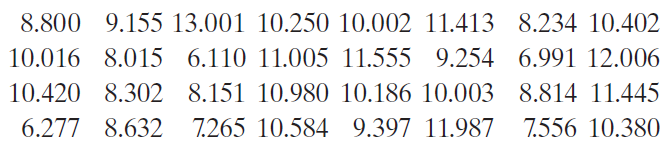

Suponha que o desvio padrão populacional é de 1.850 horas. Para o nível de significância $\alpha = 0,09$,
você tem evidência suficiente para rejeitar a afirmação
do fabricante?

In [29]:
from statsmodels.stats.weightstats import ztest
import pandas as pd
# Dados relativos à vida útil de lâmpadas fluorescentes
lamps = pd.Series([8800, 9155, 13001, 10250, 10002, 11413, 8234, 10402,
                   10016, 8015, 6110, 11005, 9254, 6991, 12006,
                   10420, 8302, 8151, 10980, 10186, 10003, 8814, 11445,
                   6277, 8632, 7265, 10584, 9397, 11987, 7556, 10380])
# Hipóetes do teste
# H0: mu >= 10000 h (afirmação)
# H1: mu < 10000 h
# Nível de significância
alpha = 0.09
# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=lamps, x2=None, value=10000, alternative='smaller')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
# Teste de hipótese usando a função teste_z
print()
p_valor = teste_z(est_amostral=lamps.mean(), n_amostras=len(lamps), alpha=alpha,
                  mu=10000, sigma=1850, teste='esq')
# Teste de hipótese usando a função teste_z_alt
print()
z0 = teste_z_alt(est_amostral=lamps.mean(), n_amostras=len(lamps), alpha=alpha,
                 mu=10000, sigma=1850, teste='esq')

Hipótese nula rejeitada ao nível de significância 9.0%

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com p-valor = 0.073104
Hipótese nula rejeitada ao nível de significância 9.0%

*** Teste de hipótese para a média (sigma conhecido) ***
Teste unilateral à esquerda com z0 = -1.340755
Hipótese nula rejeitada ao nível de significância 9.0%
